In [1]:
import h5py
import pandas as pd 
import numpy as np
from tensorflow import keras
from keras.models import Sequential

In [2]:
data = h5py.File('SVHN_single_grey1.h5', 'r')

In [3]:
!pip install --no-binary=h5py h5py

In [4]:
#!pip install h5py

In [5]:
list(data.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [6]:
x_train = data['X_train'][:]

In [7]:
x_train.shape

(42000, 32, 32)

In [8]:
x_train

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

In [9]:
y_train = data['y_train'][:]

In [10]:
y_train.shape

(42000,)

In [11]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

In [12]:
x_test = data['X_test'][:]

In [13]:
x_test.shape

(18000, 32, 32)

In [14]:
x_test

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]],

       [[115.1609, 114.161 , 113.1611, ..., 112.0302, 112.6711,
         112.7851],
        [110.5743, 110.2754, 108.9766, ..., 106.1448, 106.7857,
         107.0137],
        [102.8031, 102.5042, 101.7924, ...,  95.776 ,  95.531 ,
          95.645 ],
        ...,
        [169.8457, 170.6176, 167.8028, ...,  45.1708,  55.6967,
          62.81  ],
        [157.7329, 157.6189, 153.8042, ...,  42.9538,  50.1811,
          56.1805],
        [150.3207, 149.2068, 144.8051, ...,  42.

In [15]:
y_test = data['y_test'][:]

In [16]:
y_test.shape

(18000,)

In [17]:
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

# Viewing an image in the train data

In [18]:
import matplotlib.pyplot as plt

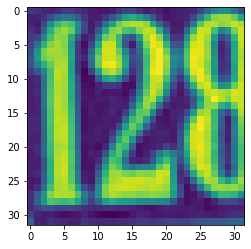

In [19]:
plt.imshow(x_train[0])

# How many digits in X-train (Counts)!

In [20]:
a = pd.DataFrame(y_train)

# Verifying the number of categories

In [21]:
a.value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
4    4188
8    4188
0    4186
1    4172
6    4168
dtype: int64

In [22]:
a.value_counts().sum()

42000

# Scaling x_train

In [23]:
x_train = x_train/255.0

In [24]:
x_train

array([[[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 ,
         0.2283153 , 0.16860352],
        [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 ,
         0.40534863, 0.33056822],
        [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473,
         0.47754902, 0.45263842],
        ...,
        [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059,
         0.09840274, 0.10219726],
        [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294,
         0.11556196, 0.11790627],
        [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727,
         0.19942354, 0.20799099]],

       [[0.34101608, 0.3414451 , 0.34656274, ..., 0.3600055 ,
         0.35195178, 0.3628635 ],
        [0.33995295, 0.340829  , 0.34287727, ..., 0.35580626,
         0.3419765 , 0.34730548],
        [0.33711922, 0.33652744, 0.33695647, ..., 0.25044155,
         0.23458785, 0.21521765],
        ...,
        [0.35381806, 0.35703844, 0.3665243 , ..., 0.21707255,
         0.19051842, 0.17276745],
        [0.3

# Scaling x_test

In [25]:
x_test = x_test/255.0

In [26]:
x_test

array([[[0.15905097, 0.18349686, 0.19206432, ..., 0.43966785,
         0.44309962, 0.43986115],
        [0.15465844, 0.17369059, 0.18500705, ..., 0.43534195,
         0.43508825, 0.4311247 ],
        [0.1507796 , 0.1711349 , 0.19101882, ..., 0.4309494 ,
         0.43114275, 0.42786196],
        ...,
        [0.13720353, 0.13910078, 0.15555921, ..., 0.42827842,
         0.4310094 , 0.44209644],
        [0.13984391, 0.13939686, 0.15811491, ..., 0.43529335,
         0.43940786, 0.4484043 ],
        [0.1419102 , 0.13890745, 0.15960705, ..., 0.43143883,
         0.4360851 , 0.44780627]],

       [[0.45161137, 0.44769022, 0.44376904, ..., 0.4393341 ,
         0.44184744, 0.4422945 ],
        [0.4336247 , 0.43245253, 0.42735922, ..., 0.4162541 ,
         0.41876745, 0.41966158],
        [0.40314943, 0.40197727, 0.39918587, ..., 0.37559217,
         0.37463138, 0.3750784 ],
        ...,
        [0.6660616 , 0.6690886 , 0.6580502 , ..., 0.17714038,
         0.21841843, 0.24631374],
        [0.6

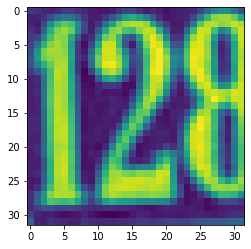

In [27]:
plt.imshow(x_train[0])

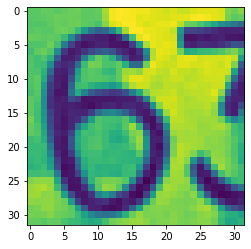

In [28]:
plt.imshow(x_train[1])

# REshaping of x_train

In [29]:
import matplotlib.pyplot as plt

In [30]:
x_train = x_train.reshape(len(x_train), 32*32)

In [31]:
x_train.shape

(42000, 1024)

In [32]:
x_train

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745],
       [0.48284313, 0.49356118, 0.47872823, ..., 0.36837214, 0.41093138,
        0.44637334],
       ...,
       [0.6042902 , 0.61100274, 0.6149663 , ..., 0.52993256, 0.53592   ,
        0.5398412 ],
       [0.8137075 , 0.8176286 , 0.8353796 , ..., 0.83974785, 0.8319055 ,
        0.820142  ],
       [0.37285647, 0.37677765, 0.39246237, ..., 0.5414914 , 0.5509529 ,
        0.5509529 ]], dtype=float32)

# Reshaping of x-test

In [33]:
x_test = x_test.reshape(len(x_test),32*32)

In [34]:
x_test.shape

(18000, 1024)

In [35]:
x_test

array([[0.15905097, 0.18349686, 0.19206432, ..., 0.43143883, 0.4360851 ,
        0.44780627],
       [0.45161137, 0.44769022, 0.44376904, ..., 0.1652502 , 0.18922432,
        0.20883021],
       [0.52256864, 0.52834475, 0.53456783, ..., 0.50266707, 0.5012169 ,
        0.5027937 ],
       ...,
       [0.6517247 , 0.64594865, 0.6385533 , ..., 0.6388313 , 0.6383843 ,
        0.63793725],
       [0.5395208 , 0.5360466 , 0.5286514 , ..., 0.56779647, 0.5599541 ,
        0.55603296],
       [0.11836078, 0.11836078, 0.11836078, ..., 0.13760431, 0.1359851 ,
        0.13368313]], dtype=float32)

# Let y_train be a categorical one

In [36]:
# preparing the response dATA
from tensorflow.keras.utils import to_categorical

In [37]:
y_train = to_categorical(y_train, num_classes=10) 

In [38]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# viewing on image in the train data

In [39]:
!pip install --no-binary=h5py h5py


# 18000 rows y-test

In [40]:
y_test = to_categorical(y_test, num_classes=10)

In [41]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [42]:
seq = Sequential()

In [43]:
from keras.layers import Dense

In [44]:
seq.add(Dense(1024, activation = 'relu'))
seq.add(Dense(512, activation = 'relu'))
seq.add(Dense(256, activation = 'relu'))
seq.add(Dense(10, activation = 'softmax'))

In [45]:
seq.compile(optimizer = 'rmsprop',
           loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

In [46]:
seq.fit(x_train,y_train, epochs=10,batch_size=100)

Epoch 1/10
420/420 [==============================] - 22s 50ms/step - loss: 2.2343 - accuracy: 0.1726
Epoch 2/10
420/420 [==============================] - 21s 50ms/step - loss: 1.7236 - accuracy: 0.3951
Epoch 3/10
420/420 [==============================] - 21s 49ms/step - loss: 1.4694 - accuracy: 0.5061
Epoch 4/10
420/420 [==============================] - 21s 51ms/step - loss: 1.3066 - accuracy: 0.5699
Epoch 5/10
420/420 [==============================] - 21s 51ms/step - loss: 1.2052 - accuracy: 0.6087
Epoch 6/10
420/420 [==============================] - 21s 50ms/step - loss: 1.1325 - accuracy: 0.6358
Epoch 7/10
420/420 [==============================] - 21s 50ms/step - loss: 1.0691 - accuracy: 0.6569
Epoch 8/10
420/420 [==============================] - 21s 50ms/step - loss: 1.0064 - accuracy: 0.6754
Epoch 9/10
420/420 [==============================] - 21s 50ms/step - loss: 0.9644 - accuracy: 0.68871s -
Epoch 10/10
420/420 [==============================] - 22s 52ms/step - loss: 0

In [47]:
seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (100, 1024)               1049600   
_________________________________________________________________
dense_1 (Dense)              (100, 512)                524800    
_________________________________________________________________
dense_2 (Dense)              (100, 256)                131328    
_________________________________________________________________
dense_3 (Dense)              (100, 10)                 2570      
Total params: 1,708,298
Trainable params: 1,708,298
Non-trainable params: 0
_________________________________________________________________


# Evaluate trained model

In [48]:
train_loss, train_acc = seq.evaluate(x_train,y_train)

1313/1313 [==============================] - 11s 8ms/step - loss: 0.7752 - accuracy: 0.7598


In [49]:
print('train_acc:',train_acc)

train_acc: 0.7597857117652893


In [50]:
print('train_loss:',train_loss)

train_loss: 0.7751551270484924


# Evalute test results

In [51]:
test_loss,test_acc = seq.evaluate(x_test,y_test)

563/563 [==============================] - 5s 8ms/step - loss: 0.8454 - accuracy: 0.7436


In [52]:
print('test_acc:',test_acc)

test_acc: 0.7436110973358154


In [53]:
print('test_loss:',test_loss)

test_loss: 0.8453622460365295
